## Yelp Case study - favourable words from restaurant reviews

In [19]:
# imported the required libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


## What is the most popular type of restaurant?
Now, we will find the most popular restaurant category from the Yelp Business Dataset.

In [2]:
# Project directory
os.chdir("/Users/lauraurdapilleta/Documents/Data Science/Data Science Career Track Prep Course/Yelp")

In [3]:
# reading the dataset
business = pd.read_json('business.json', lines=True)

In [4]:
# Sneak peek of the dataset
business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [5]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
address         192609 non-null object
attributes      163773 non-null object
business_id     192609 non-null object
categories      192127 non-null object
city            192609 non-null object
hours           147779 non-null object
is_open         192609 non-null int64
latitude        192609 non-null float64
longitude       192609 non-null float64
name            192609 non-null object
postal_code     192609 non-null object
review_count    192609 non-null int64
stars           192609 non-null float64
state           192609 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


In [6]:
business.shape

(192609, 14)

Dropping not needed columns

After running business head, info, and shape (see above), we can see that the business dataset has a total of 192609 datapoints (rows) and 14 categories (columns). Nevertheless, for the purpose of finding the most popular restaurant category, we do not need the following columns: address, attributes (facilities offered), the hours open, whether it's still open or not, latitude, longitude, and the name of the restaurant, and postal code. So we will go ahead and drop the columns we don't need. 

In [7]:
# two lines of code here:
# 1. created a list of columns to drop, called it drop_cols
# 2. dropped those columns from the DataFrame
drop_cols = ['address', 'attributes', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'postal_code']
business.drop(drop_cols, axis=1, inplace=True)

Bellow, we can see that there are 6 columns left out of the 15 original categories. That is, the eight categories selected were successfully dropped. 

In [8]:
business.head()

,business_id,categories,city,review_count,stars,state
0,1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,5,3.0,AZ
1,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,128,2.5,ON
2,gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,170,4.0,NC
3,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,3,5.0,AZ
4,HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,4,4.0,NC


In [9]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 6 columns):
business_id     192609 non-null object
categories      192127 non-null object
city            192609 non-null object
review_count    192609 non-null int64
stars           192609 non-null float64
state           192609 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 8.8+ MB


Now we have a much more manageable width of data.

Our first task is to identify the most popular type of restaurant. We could simply count each individual category in this column. But in this case that is not possible because each item in the 'categories' column is a string with multiple categories separated by commas. We can confirm this as follow:

In [11]:
# First, let's see the first item of the column 'categories'
print(business.categories[0])

Golf, Active Life


In [12]:
# Now, let's see what is the type of the element of the column 'categories'
type(business.categories[0])

str

In [13]:
#Another way to determine the type of element is by asking for the first element of the first element. 
#If the first element was a list instead of a string, this would return 'Golf', not 'G'
business.categories[0][0]

'G'

In [14]:
# Now, let's slipt the strings into lists, that way we will be able to count the different categories. 
# e.g. the string "Golf, Active Life" becomes the list ["Golf", "Active Life"]
business['categories'] = business['categories'].str.split(pat = ', ?')

In [15]:
business.head()

,business_id,categories,city,review_count,stars,state
0,1SWheh84yJXfytovILXOAQ,"[Golf, Active Life]",Phoenix,5,3.0,AZ
1,QXAEGFB4oINsVuTFxEYKFQ,"[Specialty Food, Restaurants, Dim Sum, Importe...",Mississauga,128,2.5,ON
2,gnKjwL_1w79qoiV3IC_xQQ,"[Sushi Bars, Restaurants, Japanese]",Charlotte,170,4.0,NC
3,xvX2CttrVhyG2z1dFg_0xw,"[Insurance, Financial Services]",Goodyear,3,5.0,AZ
4,HhyxOkGAM07SRYtlQ4wMFQ,"[Plumbing, Shopping, Local Services, Home Serv...",Charlotte,4,4.0,NC


In [29]:
# Now that the elements in categories have been slipt into list of categories, 
# let's count the frequency of each item in categories and keep the top twenty.
# Then, we will assign the result to the variable category_counts
category_counts = business['categories'].apply(pd.Series).stack().reset_index(drop=True).value_counts().head(20)

Let's see a bar plot which will give us a visual representation of the frequency of the top 20 categories. 

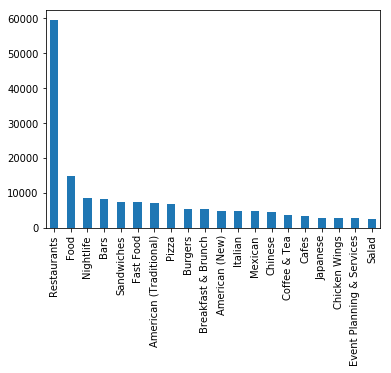

In [30]:
category_counts.plot(kind='bar')

For our surprise, our business dataset contains more than just our desired industry (restaurants). Restaurants do seem to be our most frequent type of business, but represent fewer than 60,000 out of our original 188,000 businesses.

# Missing Categories

Before we continue, let's see if there are business_id without categories, that is. If here are missing values in the column 'categories', and if so, how many. 

In [31]:
pd.isna(business['categories']).sum()

0

There are 482 business_id that have no category associated with them. Clearly, these are not much use to us. First, we will have a quick look at the first few of them to check


In [27]:
business.loc[pd.isna(business['categories'])].head()

,business_id,categories,city,review_count,stars,state


Now that we have confirmed that there is no information in the categories column for these businesses, we will go ahead and remove these 482 rows from the DataFrame. 

In [21]:
business = business.loc[~pd.isna(business['categories'])]

In [22]:
business.shape

(192127, 6)

Now, let's filter our business DataFrame to keep just those rows (businesses) that are restaurants. 

In [32]:
business = business.loc[business['categories'].apply(lambda x: 'Restaurants' in x), :]

In [33]:
business.shape

(59371, 6)

And now we can count the different categories for what should now just be restaurants.

In [34]:
restaurant_category_counts = business['categories'].apply(pd.Series).stack().reset_index(drop=True).value_counts().head(20)

In [35]:
restaurant_category_counts.head()

Restaurants    59371
Food           14800
Nightlife       8562
Bars            8182
Sandwiches      7332
dtype: int64

## Identify the best (in this case, the most popular) type of restaurant category

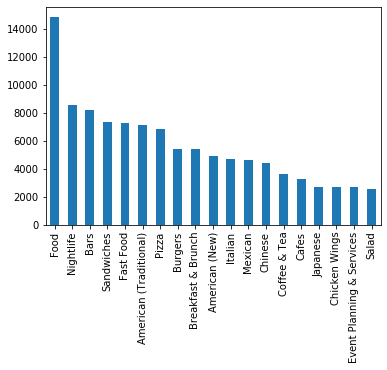

In [55]:
#'Restaurants', of course, is our most frequent entry because, by definition, it is present in every case! 
#Now, let's plot a bar chart of the frequencies of the other values.
restaurant_category_counts[1:].plot(kind='bar')

We see we still have a few noise categories coming in, such as 'Food' and 'Nightlife'. But we can see that Pizza restaurants would seem to be a good bet for our marketing campaign trial! However, we also notice that Italian is pretty close behind. Therefore, we'll use businesses that mention either Pizza or Italian.

In [36]:
# Let's keep only the business_id that mention either Pizza or Italian and assign the results to italian_pizza
italian_pizza = business.loc[business['categories'].apply(lambda x: ('Pizza' in x) | ('Italian' in x)), :]

In [37]:
italian_pizza.head()

,business_id,categories,city,review_count,stars,state
13,fweCYi8FmbJXHCqLnwuk8w,"[Italian, Restaurants, Pizza, Chicken Wings]",Mentor-on-the-Lake,16,4.0,OH
17,PZ-LZzSlhSe9utkQYU8pFg,"[Restaurants, Italian]",Las Vegas,40,4.0,NV
35,BvYU3jvGd0TJ7IyZdfiN2Q,"[Sandwiches, Italian, American (Traditional), ...",Charlotte,16,3.5,NC
80,PkDghu4aan2_wxrhXjTEgg,"[Nightlife, Italian, Restaurants, Japanese, Lo...",Calgary,16,3.5,AB
83,RFbMVekR8lU9tPJ8sWrwHg,"[Italian, Restaurants]",Toronto,18,4.0,ON


In [38]:
# Check the shape of the DataFrame
italian_pizza.shape

(9224, 6)

In [39]:
# Now, let's save the results of italian_pizza into a new file
# Also, we are only keeping the variables we need: business_id, review_count, stars, and state columns
italian_pizza.to_csv('business_list.csv', columns=['business_id', 'review_count', 'stars', 'state'], index=False)

We have answered of first question. A popular restaurant categories to work with is pizza or italian restaurant. 

## Extracting desired business reviews

So far, we have identified the business category (pizza/italian) that our marketing campaign is going to target. Also, we have identified the business IDs associated with those categories. Now, we are going to use the 'reviews' file, that is the document with the actual reviews. The identified business IDs will allow us to select just the reviews of interest from the reviews file. 

List of required Business IDs

In [40]:
#First, read in our previously created file that contains the business IDs of interest
businesses = pd.read_csv('business_list.csv')

In [41]:
#Let's have a quick look
businesses.head()

,business_id,review_count,stars,state
0,fweCYi8FmbJXHCqLnwuk8w,16,4.0,OH
1,PZ-LZzSlhSe9utkQYU8pFg,40,4.0,NV
2,BvYU3jvGd0TJ7IyZdfiN2Q,16,3.5,NC
3,PkDghu4aan2_wxrhXjTEgg,16,3.5,AB
4,RFbMVekR8lU9tPJ8sWrwHg,18,4.0,ON


In [42]:
#Now, let's create a list with just the Business IDs
business_ids = businesses['business_id'].values
print(business_ids[:5])

['fweCYi8FmbJXHCqLnwuk8w' 'PZ-LZzSlhSe9utkQYU8pFg'
 'BvYU3jvGd0TJ7IyZdfiN2Q' 'PkDghu4aan2_wxrhXjTEgg'
 'RFbMVekR8lU9tPJ8sWrwHg']


## Filtering the large data file in chunks

The review data file comprises some nearly 6 million lines. We don't want all of those lines. Our general approach will be to read through the file and check the business_id in each row. If this ID is contained in our list of wanted IDs, we will keep that row. 

In [43]:
# Task: create a review reader object for our review file
review_reader = pd.read_json('review.json', lines=True, chunksize=100000)

In [44]:
%%time
# task: process the file one chunk at a time,
# filter that chunk for rows with a business_id in business_ids
reviews = [review.loc[review['business_id'].apply(lambda x: x in business_ids)] for review in review_reader]

CPU times: user 56min 17s, sys: 2min 14s, total: 58min 32s
Wall time: 1h 1min 54s


In [45]:
# converting your reviews from list into a DataFrame
reviews = pd.concat(reviews)

In [46]:
reviews.shape

(594862, 9)

In [47]:
reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
5,eU_713ec6fTGNO4BegRaww,0,2013-01-20 13:25:59,0,fdiNeiN_hoCxCMy2wTRW9g,4,I'll be the first to admit that I was not exci...,0,w31MKYsNFMrjhWxxAb5wIw
12,FxLfqxdYPA6Z85PFKaqLrg,0,2016-05-07 01:36:53,0,Z7wgXp98wYB57QdRY3HQ3w,4,Wow. So surprised at the one and two star revi...,0,GYNnVehQeXjty0xH7-6Fhw
15,YvrylyuWgbP90RgMqZQVnQ,0,2017-04-07 21:27:49,0,svK3nBU7Rk8VfGorlrN52A,5,You can't really find anything wrong with this...,0,NJlxGtouq06hhC7sS2ECYw
19,y-Iw6dZflNix4BdwIyTNGA,0,2014-06-27 21:19:23,0,4bUyL7lzoWzDZaJETAKREg,3,Good selection of classes of beers and mains. ...,0,_N7Ndn29bpll_961oPeEfw
20,qx6WhZ42eDKmBchZDax4dQ,0,2017-03-27 01:14:37,0,Amo5gZBvCuPc_tZNpHwtsA,5,"Our family LOVES the food here. Quick, friendl...",1,DzZ7piLBF-WsJxqosfJgtA


Now, let's save the reviews DataFrame to a csv called 'reviews_filtered.csv'.

In [48]:
# task: save the DataFrame to the specified file.
reviews.to_csv('reviews_filtered.csv', index=False)

From original json file and our new csv file, we've gone from around 4.4 GB down to 325 MB. This is much more manageable. 

## Review text analysis: Find a connect between review text (the specific “favorable” words) and reviewratings

In [6]:
#Import the new reviews_filtered csv file and assign it to 'reviews'
reviews = pd.read_csv('reviews_filtered.csv')

In [7]:
reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,eU_713ec6fTGNO4BegRaww,0,2013-01-20 13:25:59,0,fdiNeiN_hoCxCMy2wTRW9g,4,I'll be the first to admit that I was not exci...,0,w31MKYsNFMrjhWxxAb5wIw
1,FxLfqxdYPA6Z85PFKaqLrg,0,2016-05-07 01:36:53,0,Z7wgXp98wYB57QdRY3HQ3w,4,Wow. So surprised at the one and two star revi...,0,GYNnVehQeXjty0xH7-6Fhw
2,YvrylyuWgbP90RgMqZQVnQ,0,2017-04-07 21:27:49,0,svK3nBU7Rk8VfGorlrN52A,5,You can't really find anything wrong with this...,0,NJlxGtouq06hhC7sS2ECYw
3,y-Iw6dZflNix4BdwIyTNGA,0,2014-06-27 21:19:23,0,4bUyL7lzoWzDZaJETAKREg,3,Good selection of classes of beers and mains. ...,0,_N7Ndn29bpll_961oPeEfw
4,qx6WhZ42eDKmBchZDax4dQ,0,2017-03-27 01:14:37,0,Amo5gZBvCuPc_tZNpHwtsA,5,"Our family LOVES the food here. Quick, friendl...",1,DzZ7piLBF-WsJxqosfJgtA


We see the fourth review wasn't great, at three stars, but the fifth got five stars. Let's have a quick look at the full text for each.

A three stars review:

In [74]:
reviews.loc[3, 'text']

"Good selection of classes of beers and mains. I've been here twice.\n\nFirst time I had the fried chicken. It was delicious, but be warned, extremely salty. I couldn't even finish the last piece of chicken after experiencing a salt overload.\n\nSecond time we came on a wednesday. We didn't know it was BBQ night, where they have a completely different menu, and don't offer anything from their original vegetarian-friendly menu. This menu has one vegetarian-friendly option - an eggplant sandwich. The vegetarian in my party said it was awful. Also, on BBQ night you choose 2 sides. Except they were out of all their sides except 2 - fries and potato salad. I can't say I was thrilled to have carb heavy sides with my carb heavy main. How do you run out of sides so early in the evening?\n\nService not so great.\n\nI'd avoid coming here on wednesdays."

A five stars review:

In [75]:
reviews.loc[4, 'text']

'Our family LOVES the food here. Quick, friendly, delicious, and a great restaurant to take kids to. 5 stars!'

This certainly seems to be a good review. We'd be happy to see our restaurant associated with "family loves the food", "friendly", "delicious", "great restaurant", etc.

## Good and bad reviews: The threshold

Clearly 5 is best and 1 is worst, but how do we group them? Do we set a threshold in the middle, or just take the top and bottom ratings? Let's first see what the distribution of ratings looks like.

In [8]:
reviews['stars'].describe()

count    594862.000000
mean          3.718837
std           1.403135
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: stars, dtype: float64

In [9]:
star_counts = reviews['stars'].value_counts()

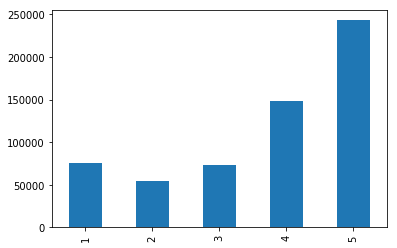

In [10]:
# task: created a bar plot of number of reviews for each star rating
star_counts.sort_index().plot(kind='bar')

It seems reviews with three stars or fewer are in the bottom quartile and reviews with five stars are in the top quartile. We will take five stars as being a single, best category, and three stars and fewer as being 'not good'.

## Visualizing reviews

From our analysis of the distribution of review star ratings, our first approach to delivering an answer to the marketing team is to look at the most popular words in the best reviews and compare them with those in the worst reviews.

First, let's extract the good and bad reviews separately.

In [11]:
# filtered the 'text' column using the 'stars' column to create series of good and bad review text
# called the results good_review_text and bad_review_text, respectively
good_review_text = reviews.loc[reviews['stars'] == 5, 'text']
bad_review_text = reviews.loc[reviews['stars'] < 4, 'text']

In [12]:
good_review_text.shape

(243057,)

In [13]:
bad_review_text.shape

(203707,)

In [14]:
#Converted all the text in lower case
good_review_text = good_review_text.str.lower()
bad_review_text = bad_review_text.str.lower()

In [15]:
# Check first few good reviews
good_review_text.head()

2     you can't really find anything wrong with this...
4     our family loves the food here. quick, friendl...
6     their pettuccine was fresh-made in the morning...
9     this place epitomizes the rumored transformati...
14    this place is quite possibly my favorite resta...
Name: text, dtype: object

In [16]:
# check first few bad reviews
bad_review_text.head()

3     good selection of classes of beers and mains. ...
7     came here on a thursday night at 6:30 p.m. my ...
8     went here last weekend and was pretty disappoi...
11    th service here is very hit or miss... sometim...
12    i took my wife out for a birthday dinner with ...
Name: text, dtype: object

So far, we partitioned our reviews into groups we think of as 'great' and 'bad'. Now, how do we interpret, or visualise, the information? A great way to get a visual look at how frequently certain words occur is by a wordcloud. 

In [21]:
# task: import WordCloud and STOPWORDS here
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [25]:
#We first need to gather the reviews into a single corpus, for each of good and bad reviews, for wordcloud.
good_text = ' '.join(review for review in good_review_text)
bad_text = ' '.join(review for review in bad_review_text)

## Good wordcloud

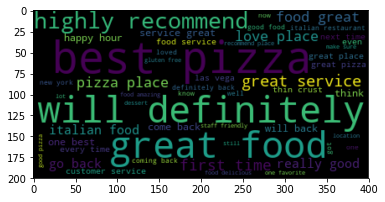

In [27]:
# generated a wordcloud of good review words, max 50 words and called the results good_wordcloud
good_wordcloud = WordCloud(max_words=50).generate(good_text)
plt.imshow(good_wordcloud, interpolation='bilinear')

## Bad wordcloud

Can we learn anything extra from looking at the top words in bad reviews?

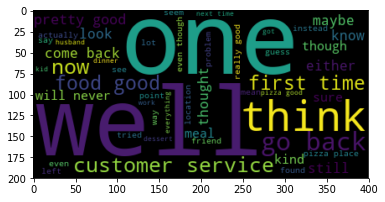

In [28]:
# generated a wordcloud of bad review words, max 50 words and called the results bad_wordcloud
bad_wordcloud = WordCloud(max_words=50).generate(bad_text)
plt.imshow(bad_wordcloud, interpolation='bilinear')

We notice some things here. Firstly, 'pizza' is a very prominent word, but it was in the top reviews as well. It's very obviously a relevant word for our target category, but is it useful in separating good and bad reviews? Probably not. We can also start to make some interesting observations that there seem to be more "dull" words here, such as "told", "said", "came", and "went". 

## Towards a better wordcloud

Having seen that some words that occur prominently in bad reviews were also in our good reviews, we can exclude these from our wordcloud by specifying them as stopwords. Let's add them to the list of default stopwords STOPWORDS.

In [29]:
bad_stopwords = set(['pizza', 'food', 'order', 'place'])

In [30]:
# created a set of stopwords and add the "bad" ones above to it
stopwords = set(STOPWORDS)
stopwords.update(bad_stopwords)

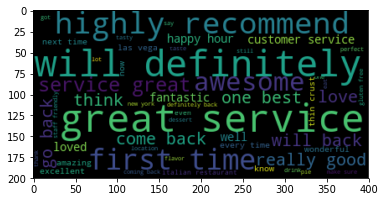

In [31]:
# generated a better wordcloud of good review words, max 50 words and called the result better_wordcloud
better_wordcloud = WordCloud(stopwords=stopwords, max_words=50).generate(good_text)
plt.imshow(better_wordcloud, interpolation='bilinear')

## Beyond words